In [1]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas
import seaborn

In [2]:
data_set = pandas.read_csv("https://raw.githubusercontent.com/kaazniy/smal-data-visualisation-project/main/dataset.csv",
                           sep=',')
list_of_col_fill = ["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance", "Uniformity", "Clean.Cup",
                    "Sweetness", "Cupper.Points", "Total.Cup.Points", "Moisture", "Category.One.Defects", "Quakers"]
for col in list_of_col_fill:
    data_set[col].fillna(data_set[col].mean(), inplace=True)
data_set.dropna(inplace=True)

In [3]:
data_set.head(100)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
29,29,Arabica,"lin, che-hao krude 林哲豪",Taiwan,tsoustructive garden 鄒築園,Tsoustructive 2015 Sumatra Typica,tsoustructive garden 鄒築園,Taiwan,taiwan coffee laboratory,1200,...,Green,0,"May 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1200.0,1200.0,1200.0
115,115,Arabica,"lin, che-hao krude 林哲豪",Taiwan,shi fang yuan 十方源,2016 Tainan Coffee Cupping Event Micro Lot 臺南市...,shi fang yuan 十方源,Taiwan,taiwan coffee laboratory,350,...,Green,0,"May 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.0,350.0,350.0
125,125,Arabica,consejo salvadoreño del café,El Salvador,monterrey,1-71,j.j. borja nathan,09-392-69,cafetalera del pacifico,1350,...,Blue-Green,2,"June 26th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
128,128,Arabica,rodrigo soto,Costa Rica,rio jorco,Tarrazu,rio jorco,5-423-0128,panamerican coffee trading,1150,...,Blue-Green,2,"October 4th, 2017",Specialty Coffee Association of Costa Rica,8e0b118f3cf3121ab27c5387deacdb7d4d2a60b1,5eb2b7129d9714c43825e44dc3bca9423de209e9,m,1150.0,1150.0,1150.0
129,129,Arabica,juan luis alvarado romero,Guatemala,san diego buena vista,11/08/0109,san diego buena vista,11/08/0109,"waelti schoenfeld exportadores de cafe, s.a.",1600,...,Green,1,"June 1st, 2017",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1600.0,1600.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,836,Arabica,aulia arif syahri,Indonesia,mudar,BALI INTEN DEWATA,pt. olam indonesia,015/1969/008,pt. olam indonesia,1250,...,Green,0,"January 19th, 2018",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1250.0,1250.0,1250.0
837,837,Arabica,juan luis alvarado romero,Guatemala,chapultepec,11/23/0507,beneficio ixchel,11/23/0507,"unex guatemala, s.a.",3280,...,Green,6,"August 2nd, 2017",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,3280.0,3280.0,3280.0
859,859,Arabica,juan luis alvarado romero,Guatemala,las merceditas,11/23/0514,beneficio ixchel,11/23/0514,"unex guatemala, s.a.",1700,...,Green,1,"June 22nd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.0,1700.0,1700.0
870,870,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,019/17,dry mill,002/1660/0079,ipanema coffees,890,...,Green,5,"October 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,890.0,890.0,890.0


In [4]:
print("The size of the data :", data_set.shape)

The size of the data : (132, 44)


In [5]:
data_set.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,632.969697,190.250000,7.568409,7.555303,7.404394,7.581136,7.537273,7.505076,9.863485,9.924167,9.896364,7.498485,82.335152,0.090379,0.356061,0.719697,2.795455,4153.672952,4153.672952,4153.672952
std,328.210878,134.538702,0.168146,0.217948,0.242211,0.260697,0.226941,0.253863,0.525726,0.417237,0.465885,0.405407,2.263464,0.039081,2.763261,1.338305,2.407807,23164.904139,23164.904139,23164.904139
min,29.000000,1.000000,7.080000,6.580000,6.330000,6.250000,6.420000,6.080000,6.000000,6.000000,6.000000,5.170000,63.080000,0.000000,0.000000,0.000000,0.000000,157.886400,157.886400,157.886400
25%,335.750000,50.000000,7.500000,7.500000,7.250000,7.500000,7.420000,7.420000,10.000000,10.000000,10.000000,7.330000,81.730000,0.100000,0.000000,0.000000,1.000000,941.500000,941.500000,941.500000
50%,590.000000,250.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.750000,0.100000,0.000000,0.000000,2.000000,1250.000000,1250.000000,1250.000000
75%,870.250000,290.000000,7.670000,7.690000,7.580000,7.750000,7.670000,7.670000,10.000000,10.000000,10.000000,7.690000,83.580000,0.110000,0.000000,1.000000,4.000000,1573.750000,1573.750000,1573.750000
max,1322.000000,550.000000,8.080000,8.000000,8.000000,8.250000,8.000000,8.170000,10.000000,10.000000,10.000000,8.500000,86.580000,0.130000,31.000000,8.000000,12.000000,190164.000000,190164.000000,190164.000000


In [6]:
data_set = data_set.rename(
    columns={"Country.of.Origin": "Origin", "Total.Cup.Points": "Total", "Processing.Method": "Process",
             "Bag.Weight": "Weight", "Harvest.Year": "Harvest_year"})

In [7]:
print("Average score out of 100 : ", round(data_set["Total"].mean(), 2))

Average score out of 100 :  82.34


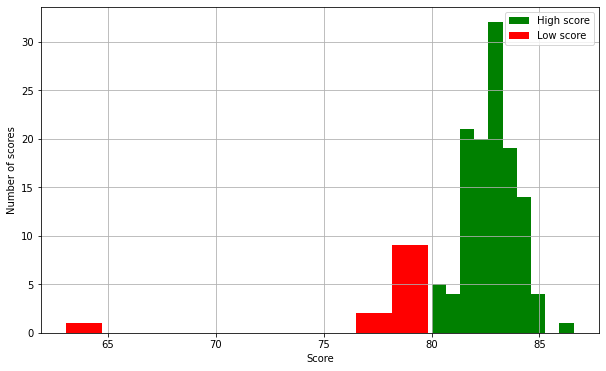

In [8]:
plt.figure(figsize=(10, 6))
data_set.query("Total >= 80")["Total"].hist(color="green", label='High score')
data_set.query("Total < 80")["Total"].hist(color="red", label='Low score')
plt.xlabel('Score')
plt.ylabel('Number of scores')
plt.legend()


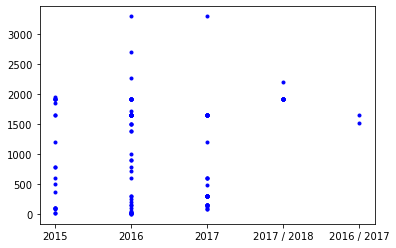

In [9]:
years = data_set.Harvest_year
bags = [int(bag) for bag in data_set["Number.of.Bags"]]
weight_bag = [int(weight[0]) for weight in data_set.Weight]
total_weight = [bags[i] * weight_bag[i] for i in range(len(bags))]
plt.plot(years, total_weight, 'b.')

<AxesSubplot:xlabel='Origin', ylabel='Category.Two.Defects'>

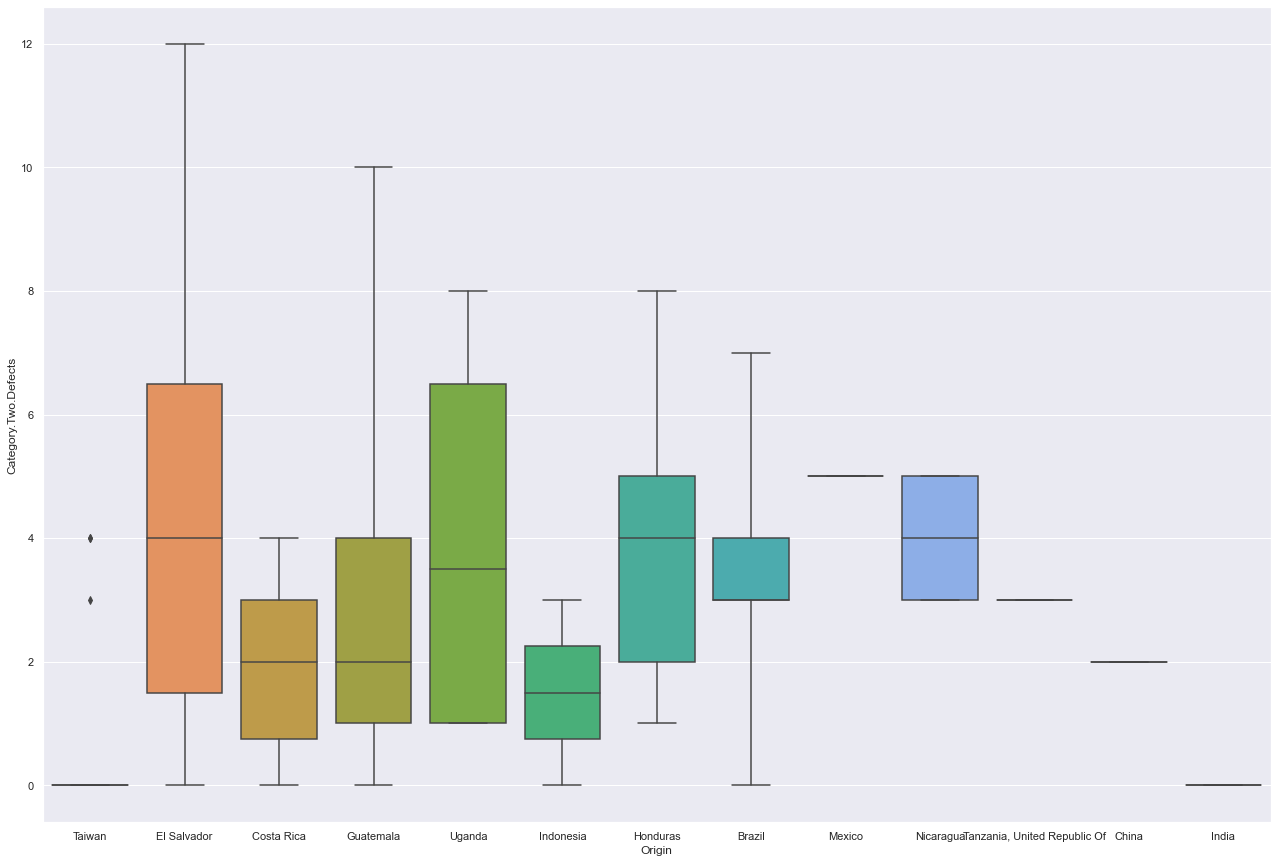

In [10]:
seaborn.set(rc={'figure.figsize': (22, 15)})
seaborn.boxplot(x='Origin', y='Category.Two.Defects', data=data_set, whis=50)

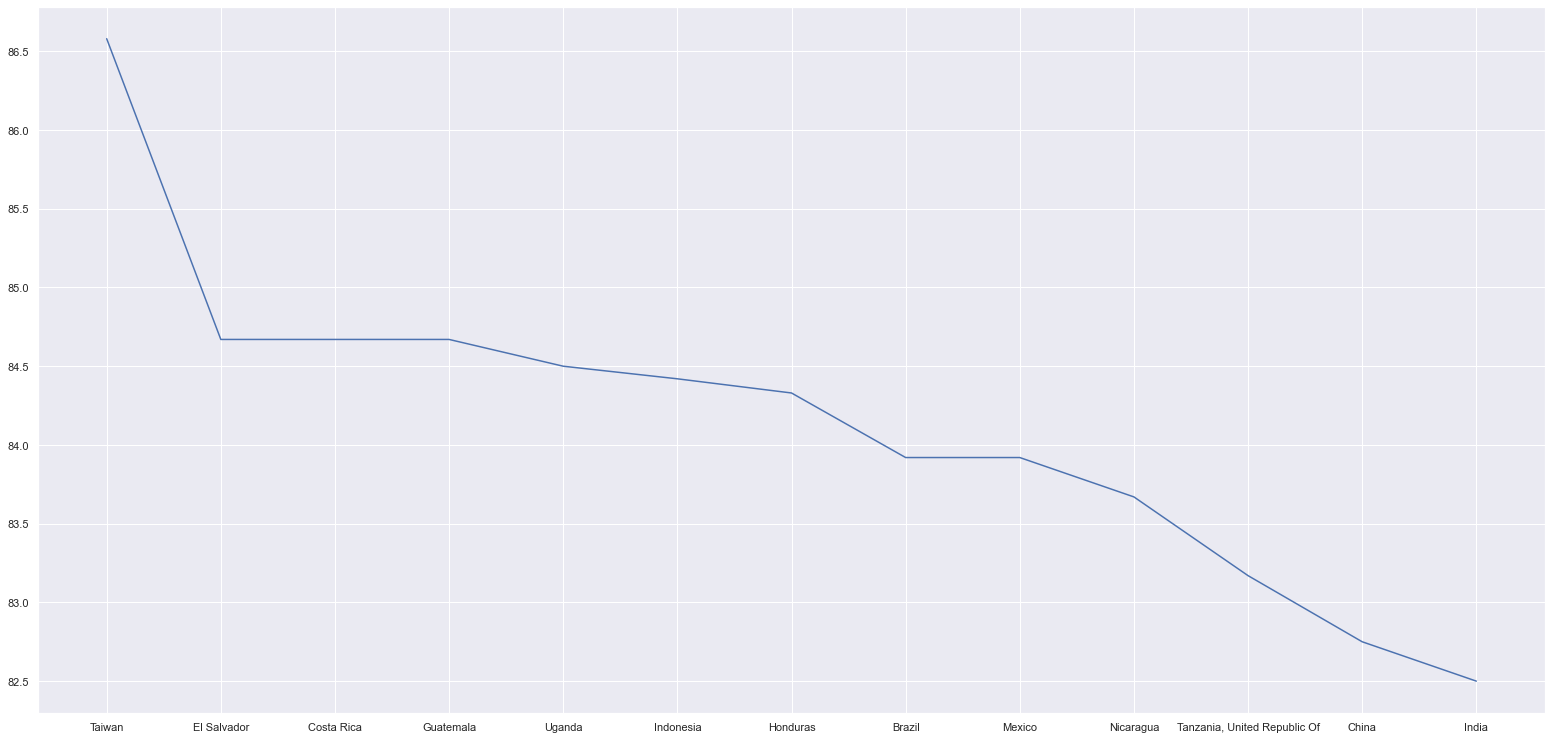

In [11]:
def plot_max_score_country(i):
    if countries[i] not in country_maxscore:
        country_maxscore[countries[i]] = scores[i]
    else:
        country_maxscore[countries[i]] = max(scores[i], country_maxscore[countries[i]])


plt.figure(figsize=(27, 13))
countries = list(data_set.Origin)
scores = list(data_set.Total)
country_maxscore = dict()
for i in range(len(scores)):
    plot_max_score_country(i)

plt.plot(country_maxscore.keys(), country_maxscore.values())

(array([20.,  8., 45.,  4.,  2., 43.,  1.,  5.,  1.,  3.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

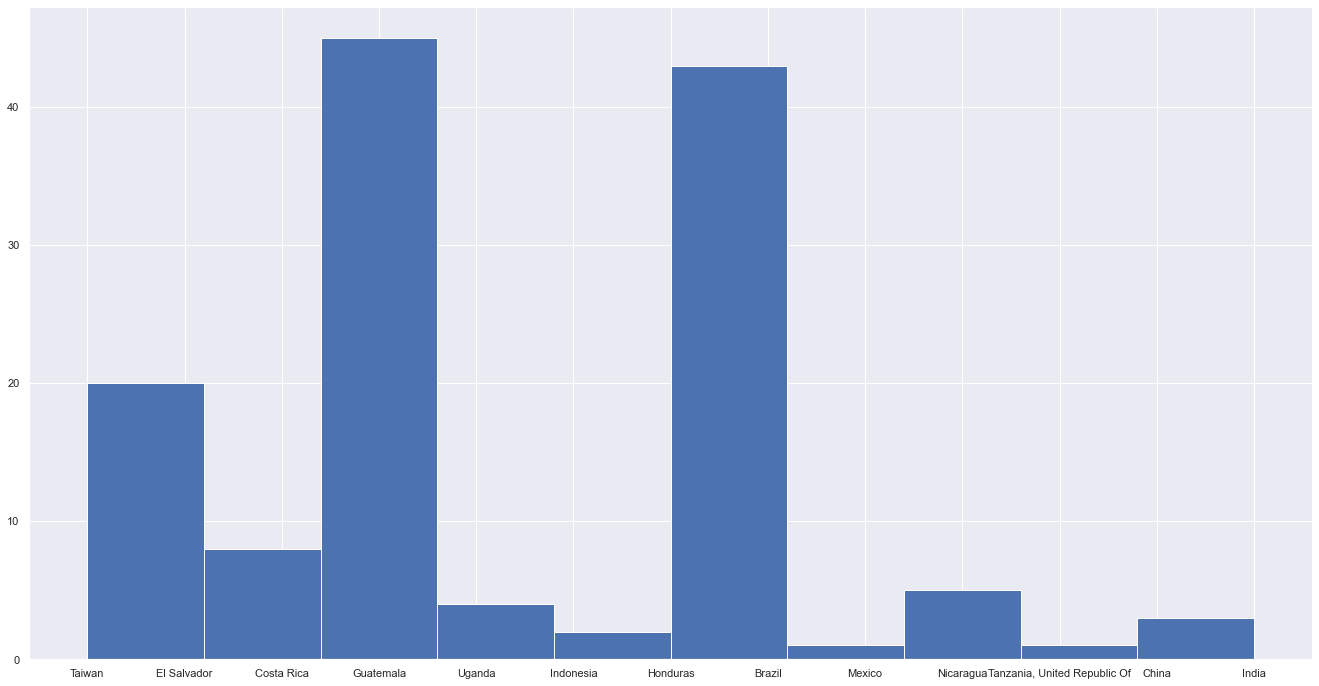

In [12]:
plt.figure(figsize=(23, 12))
plt.hist(data_set.Origin)

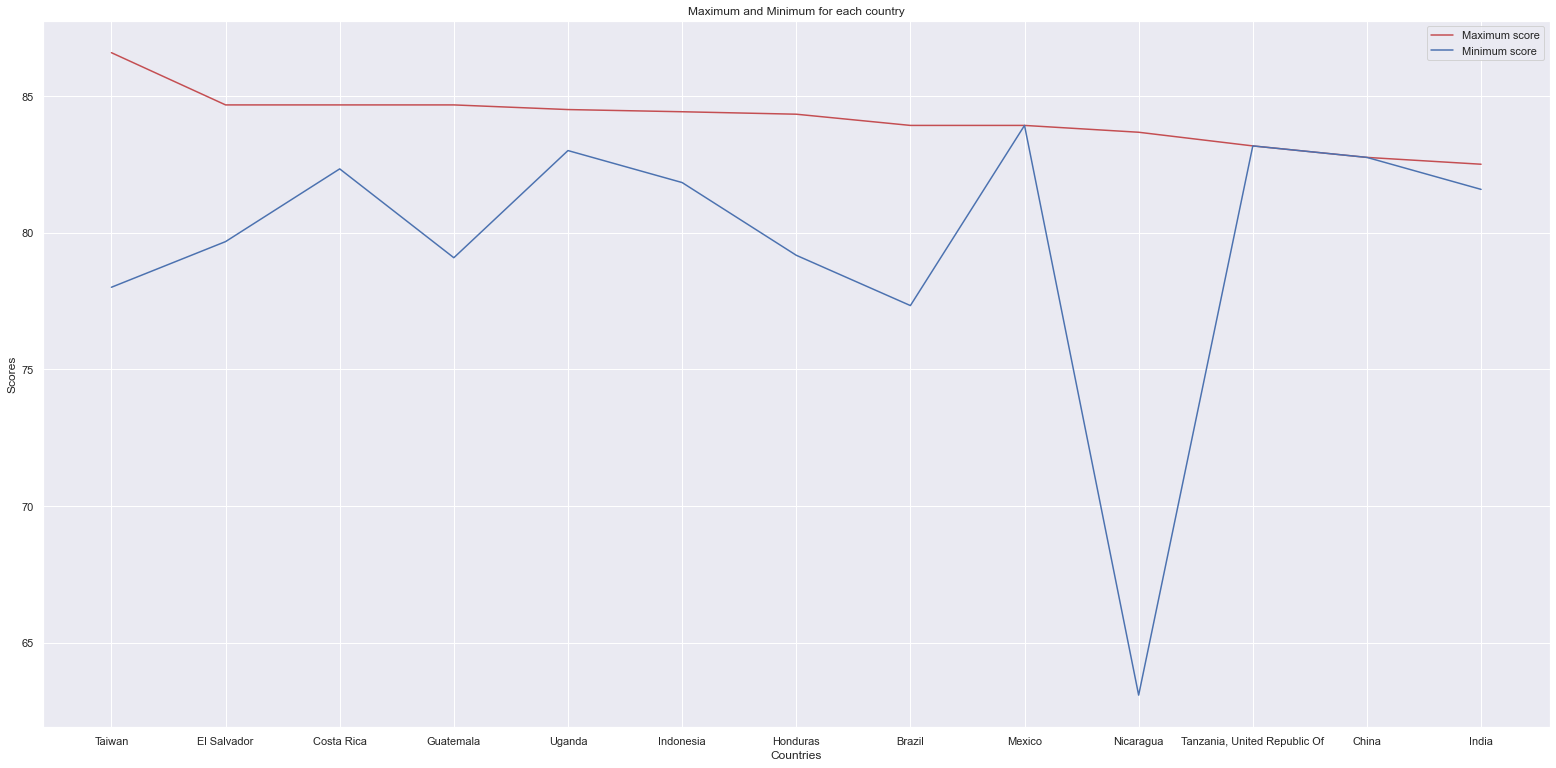

In [13]:
def plot_max_score_country(i):
    if countries[i] not in country_maxscore:
        country_maxscore[countries[i]] = scores[i]
    else:
        country_maxscore[countries[i]] = max(scores[i], country_maxscore[countries[i]])


def plot_min_score_country(i):
    if countries[i] not in country_minscore:
        country_minscore[countries[i]] = scores[i]
    else:
        country_minscore[countries[i]] = min(scores[i], country_minscore[countries[i]])


plt.figure(figsize=(27, 13))
countries = list(data_set.Origin)
scores = list(data_set.Total)
country_minscore = dict()
country_maxscore = dict()
for i in range(len(scores)):
    plot_max_score_country(i)
    plot_min_score_country(i)

plt.ylabel('Scores')
plt.xlabel('Countries')
plt.title('Maximum and Minimum for each country')

plt.plot(country_maxscore.keys(), country_maxscore.values(), color='r', label='Maximum score')
plt.plot(country_maxscore.keys(), country_minscore.values(), color='b', label='Minimum score')
plt.legend()
plt.show()